# 03 - Convolutional Neural Networks And Computer Vision with TensorFlow

In the prievious notebook we've covered the basics of TensorFlow and built some models to work across different problems.

Now we're going to get specific and see how a special kind of neural network, **Convolutional neural networks (CNNs)** can be used for computer vision (detecting patterns in visual data).

> **Note:** In deep learning, many different kinds of model architectures can be used for different problems. For example, you could use a convolutional neural network for making predictions on image data and/or text data. However, in practice some architectures typically work better than others.

For example, you might want to:
- Classify whether a picture of food contains pizza 🍕 or steak 🥩
- Detect whether or not an object appears in an image.

## What we're going to cover

Specifically, we're going to go through the follow with TensorFlow:

- Getting a dataset to work with
- Architecture of a convolutional neural network
- A quick end-to-end example
- Steps in modelling for binary image classification with CNNs
    - Becoming one with the data
    - Preparing data for modelling
    - Creating a CNN model
    - Fitting a model
    - Evaluating a model
    - Improving a model
    - Making a prediction with a trained model
- Steps in modelling for multi-class image classification with CNNs
    - Same as above (but this time with a different dataset)

## A (typical) architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. Whate you see below are some components you'd expect to find in a traditional CNN.

Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input images(s) | Target images you'd like to discover patterns in | Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size,image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with `tf.Keras.layers.ConvXD` (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU (`tf.keras.activations.relu`) |
| Pooling layer | Reduces the dimensionality of learned image features | Average (`tf.keras.layers.AvgPool2D`) or Max (`tf.keras.layers.MaxPool2D`) |
| Fully connected layer | Further refines learned features from convolutional layers | `tf.keras.layers.Dense` |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi) |
| Output activation | Adds non-linearities to output layer | `tf.keras.activations.sigmoid` (binary classification) or `tf.keras.activations.softmax` |

Example stack together : 

<center><img src = "images/03-simple-convnet.png" width = 800px></center>

## Get the data

Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

> 🔑 **Note:** To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.


We'll download the `pizza_steak` subset .zip file and unzip it.

In [ ]:
# Install wget
# !pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=c6784904cfb2b23c20f87886696cae0017dbecfc6b8da4f9531f4880c0537041
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [ ]:
import zipfile
import wget

# Download zip file of pizza_steak images
path = "data/dataset"
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
wget.download(url, out = path)

'data/dataset/pizza_steak.zip'

In [ ]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("data/dataset/pizza_steak.zip", "r")
zip_ref.extractall("data/dataset")
zip_ref.close()

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:
- A **train** directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.

- A **test** directory with the same structure as the **train** directory.

Let's inspect each of the directories we've downloaded.

To do so, we can use the command `ls` which stands for list.

In [ ]:
ls "data/dataset/pizza_steak"

 Le volume dans le lecteur C s'appelle Windows
 Le num�ro de s�rie du volume est A298-0804

 R�pertoire de c:\Users\user\Desktop\Machine Learning - Deep Learning\tensorflow-deep-learning\data\dataset\pizza_steak

26/05/2022  16:04    <DIR>          .
26/05/2022  16:04    <DIR>          ..
26/05/2022  16:04    <DIR>          test
26/05/2022  16:04    <DIR>          train
               0 fichier(s)                0 octets
               4 R�p(s)  518�317�281�280 octets libres


We can see we've got a train and test folder

In [ ]:
ls "data/dataset/pizza_steak/train"

 Le volume dans le lecteur C s'appelle Windows
 Le num�ro de s�rie du volume est A298-0804

 R�pertoire de c:\Users\user\Desktop\Machine Learning - Deep Learning\tensorflow-deep-learning\data\dataset\pizza_steak\train

26/05/2022  16:04    <DIR>          .
26/05/2022  16:04    <DIR>          ..
26/05/2022  16:04    <DIR>          pizza
26/05/2022  16:04    <DIR>          steak
               0 fichier(s)                0 octets
               4 R�p(s)  518�317�113�344 octets libres


In [ ]:
ls "data/dataset/pizza_steak/train/steak"

 Le volume dans le lecteur C s'appelle Windows
 Le num�ro de s�rie du volume est A298-0804

 R�pertoire de c:\Users\user\Desktop\Machine Learning - Deep Learning\tensorflow-deep-learning\data\dataset\pizza_steak\train\steak

26/05/2022  16:04    <DIR>          .
26/05/2022  16:04    <DIR>          ..
26/05/2022  16:04            36�185 1000205.jpg
26/05/2022  16:04            34�497 100135.jpg
26/05/2022  16:04           116�802 101312.jpg
26/05/2022  16:04            56�754 1021458.jpg
26/05/2022  16:04            34�143 1032846.jpg
26/05/2022  16:04            24�688 10380.jpg
26/05/2022  16:04            37�134 1049459.jpg
26/05/2022  16:04            49�841 1053665.jpg
26/05/2022  16:04            59�983 1068516.jpg
26/05/2022  16:04            28�996 1068975.jpg
26/05/2022  16:04            29�525 1081258.jpg
26/05/2022  16:04            49�577 1090122.jpg
26/05/2022  16:04            59�976 1093966.jpg
26/05/2022  16:04            60�253 1098844.jpg
26/05/2022  16:04            6

We have a whole bunch of images. It seems we have 750 images.

In [ ]:
import os

# Walk through pizza_steak directory and list  number of files
for dirpath, dirnames, filenames in os.walk("data/dataset/pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in data/dataset/pizza_steak
There are 2 directories and 0 images in data/dataset/pizza_steak\test
There are 0 directories and 250 images in data/dataset/pizza_steak\test\pizza
There are 0 directories and 250 images in data/dataset/pizza_steak\test\steak
There are 2 directories and 0 images in data/dataset/pizza_steak\train
There are 0 directories and 750 images in data/dataset/pizza_steak\train\pizza
There are 0 directories and 750 images in data/dataset/pizza_steak\train\steak


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("data/dataset/pizza_steak/train/pizza"))
num_steak_images_train

750

In [ ]:
# Get the class names (programmatically, this is much more helpful with a  a longer list of classes)
import pathlib
data_dir = pathlib.Path("data/dataset/pizza_steak/train") # turn our training path into a Python path
class_names = [item.name for item in data_dir.glob("*")]
class_names

['pizza', 'steak']

> **Note:** Whenever you're working with data, it's always good to visualize it as much as possible.

Let's visualize our images

In [ ]:
# Visualize the images
import matplotlib.pyplot as plt 
import matplotlib.image as mpimp
import random

def view_random_image(target_dir,target_class):
    """
    Visualize a random picture of a selected class from a target directory 
    
    Inputs:
    - target_dir : path of the target directory
    - target_class : name of the target class

    Return:
    - img : image
    """

    # figure
    plt.figure()
    
    # setup the targert directory 
    target_folder = f'{target_dir}/{target_class}'

    # get a random image path
    random_image = random.sample(os.listdir(target_folder),1)

    # Reag in the image and plot it using matplotlib
    img = mpimp.imread(f'{target_folder}/{random_image[0]}')
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    # show the shape of the image
    print(f"Image shape: {img.shape}")

    return img


Image shape: (512, 512, 3)


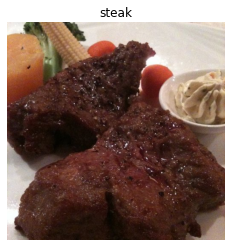

In [ ]:
# view a random image from the training set
img = view_random_image(target_dir="data/dataset/pizza_steak/train",target_class="steak")

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)
Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


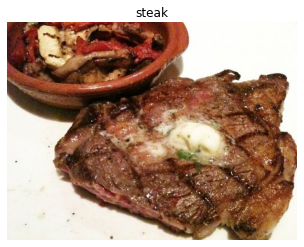

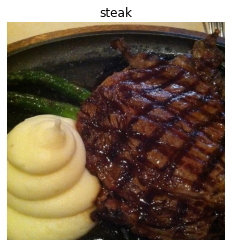

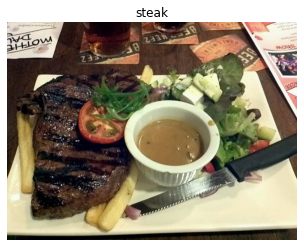

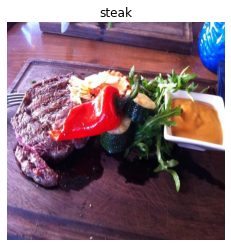

In [ ]:
# let's plot different images of the steak class
for i in range(4):
    view_random_image(target_dir="data/dataset/pizza_steak/train",target_class="steak")

Image shape: (384, 512, 3)
Image shape: (512, 382, 3)
Image shape: (512, 512, 3)
Image shape: (332, 512, 3)


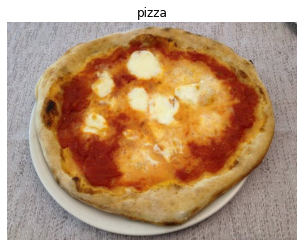

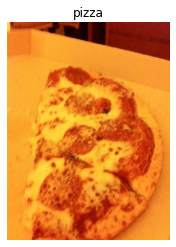

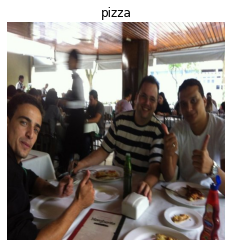

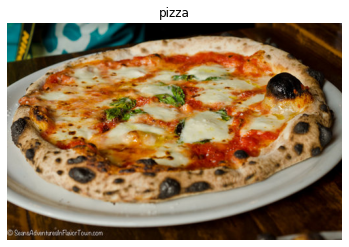

In [ ]:
# let's plot different images of the pizza class
for i in range(4):
    view_random_image(target_dir="data/dataset/pizza_steak/train",target_class="pizza")

In [ ]:
# view the img
img

array([[[243, 234, 225],
        [244, 235, 226],
        [245, 236, 229],
        ...,
        [241, 226, 205],
        [240, 225, 204],
        [243, 227, 204]],

       [[243, 234, 225],
        [243, 234, 225],
        [244, 235, 228],
        ...,
        [242, 227, 206],
        [240, 224, 201],
        [238, 222, 199]],

       [[248, 239, 230],
        [244, 235, 226],
        [242, 233, 226],
        ...,
        [243, 227, 204],
        [242, 226, 203],
        [238, 222, 197]],

       ...,

       [[209, 191, 187],
        [213, 195, 191],
        [216, 201, 196],
        ...,
        [182, 156, 133],
        [178, 152, 129],
        [176, 150, 127]],

       [[213, 195, 191],
        [213, 195, 191],
        [216, 201, 196],
        ...,
        [183, 156, 135],
        [182, 155, 134],
        [182, 155, 134]],

       [[221, 203, 199],
        [215, 197, 193],
        [214, 199, 194],
        ...,
        [180, 153, 132],
        [183, 156, 135],
        [185, 158, 137]]

In [ ]:
# shape of img
img.shape

(512, 512, 3)

As we can see img is a big tensor. The computer sees the images in the form of an array.

Looking at the image shape more closely, we can se it's in the form `(width, height, colour channels)`. In our case the width and height are vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of **red, green and blue (RGB) pixels**.

You'll notice all of the values in the `img` are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value `red=0, green=0, blue=255` will look very blue.

So when we built a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

> **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255.

In [ ]:
# Get all the pixel values between 0 and 1
max_pixel_value = img.max()
print(max_pixel_value)

img/max_pixel_value

255


array([[[0.95294118, 0.91764706, 0.88235294],
        [0.95686275, 0.92156863, 0.88627451],
        [0.96078431, 0.9254902 , 0.89803922],
        ...,
        [0.94509804, 0.88627451, 0.80392157],
        [0.94117647, 0.88235294, 0.8       ],
        [0.95294118, 0.89019608, 0.8       ]],

       [[0.95294118, 0.91764706, 0.88235294],
        [0.95294118, 0.91764706, 0.88235294],
        [0.95686275, 0.92156863, 0.89411765],
        ...,
        [0.94901961, 0.89019608, 0.80784314],
        [0.94117647, 0.87843137, 0.78823529],
        [0.93333333, 0.87058824, 0.78039216]],

       [[0.97254902, 0.9372549 , 0.90196078],
        [0.95686275, 0.92156863, 0.88627451],
        [0.94901961, 0.91372549, 0.88627451],
        ...,
        [0.95294118, 0.89019608, 0.8       ],
        [0.94901961, 0.88627451, 0.79607843],
        [0.93333333, 0.87058824, 0.77254902]],

       ...,

       [[0.81960784, 0.74901961, 0.73333333],
        [0.83529412, 0.76470588, 0.74901961],
        [0.84705882, 0

## An end-to-end example

We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

It's time to jump straight in the deep end.

Reading the [original dataset authors paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf), we see they used a **Random Forest machine learning model** and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

> **Note:** A **baseline** is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some king of modelling paper with a published result and try to beat it.

The code in the following cell replicates an end-to-end way to model our `pizza_steak` dataset with a convolutional neural network (CNN) using the components listed above.

For reference, the model we're using replicates TinyVGG, the computer vision architecture which fuels the [CNN explainer webpage](https://poloclub.github.io/cnn-explainer/)

> **Resource:** The architecture we're using below is a scaled-down version of **VGG-16**, a convolutional neural network which came 2nd in the 2014 **ImageNet classification competition**

In [ ]:
# import tensorflow libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# set seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "data/dataset/pizza_steak/train/"
test_dir = "data/dataset/pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data), # batches
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 82s 2s/step - loss: 0.5471 - accuracy: 0.7153 - val_loss: 0.3824 - val_accuracy: 0.8320
Epoch 2/5
11/47 [======>.......................] - ETA: 51s - loss: 0.4188 - accuracy: 0.8068

KeyboardInterrupt: 